#               Loan status predication

# -----------------------------------------------------------------------------------------


Objectives

predicting if the loan can be given to that person on the basis of various parameters like income, marital status, gender, etc. The prediction model not only helps the applicant but also helps the bank byminimizing the risk and reducing the number of defaulters.

1) Loan_ID: A unique loan ID

2) Gender: Either male or female

3) Married: Weather Married(yes) or Not Marttied(No)

4) Dependents: Number of persons depending on the client

5) Education: Applicant Education(Graduate or Undergraduate)

6) Self_Employed: Self-employed (Yes/No)

7) ApplicantIncome: Applicant income

8) CoapplicantIncome: Co-applicant income

9) LoanAmount: Loan amount in thousands

10) Loan_Amount_Term: Terms of the loan in months

11) Credit_History: Credit history meets guidelines

12) Property_Area: Applicants are living either Urban, Semi-Urban or Rural

13) Loan_Status: Loan approved (Y/N)


# Problem Statement

A Company wants to automate the loan eligibility process based on customer details provided while filling online applicationform. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirements are as   follows:

1.Check eligibility of the Customer given the inputs described above.(Classification)

2.If customer is not eligible for the input required amount and duration



# purpose

the lender looking at various background information about the applicant and deciding whether the bank should grant the loan.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("loan_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [5]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [6]:
obj = (df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 8


In [8]:
# Dropping Loan_ID column 
df.drop(['Loan_ID'],axis=1,inplace=True)


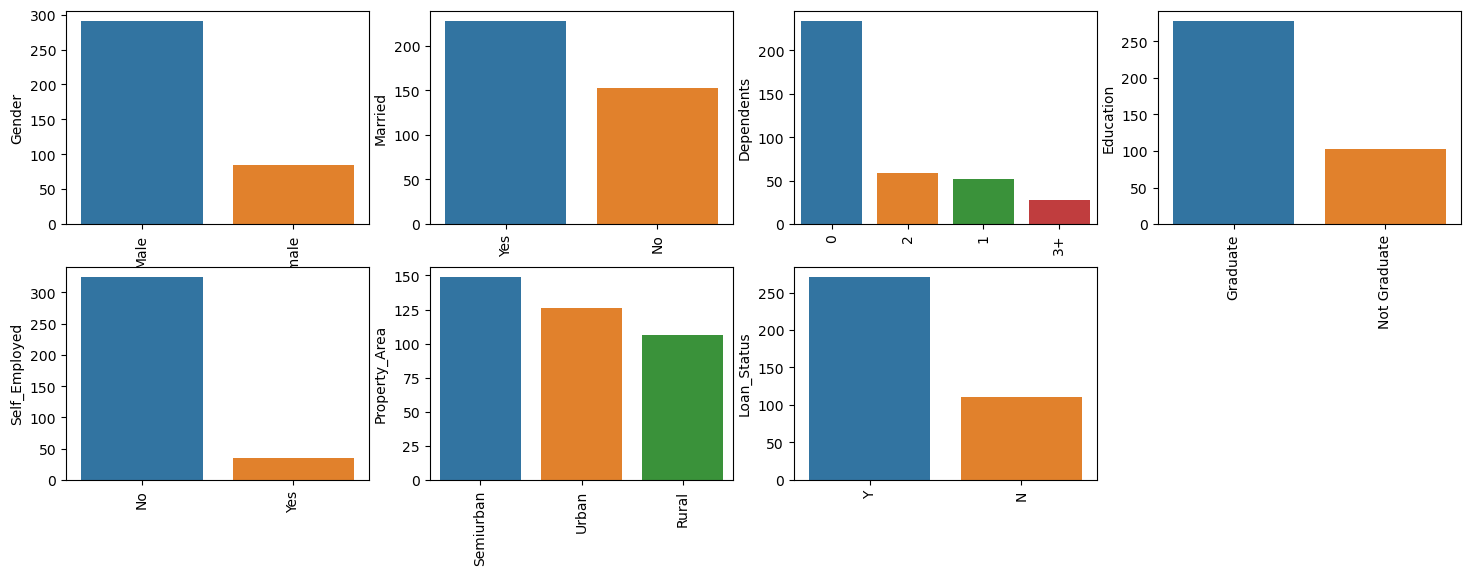

In [10]:
obj = (df.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1

for col in object_cols: 
    y = df[col].value_counts() 
    plt.subplot(11,4,index) 
    plt.xticks(rotation=90) 
    sns.barplot(x=list(y.index), y=y) 
    index +=1


In [12]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how 
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (df.dtypes == 'object') 
for col in list(obj[obj].index): 
     df[col] = label_encoder.fit_transform(df[col])


In [13]:
# To find the number of columns with 
# datatype==object 
obj = (df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 0


<AxesSubplot:>

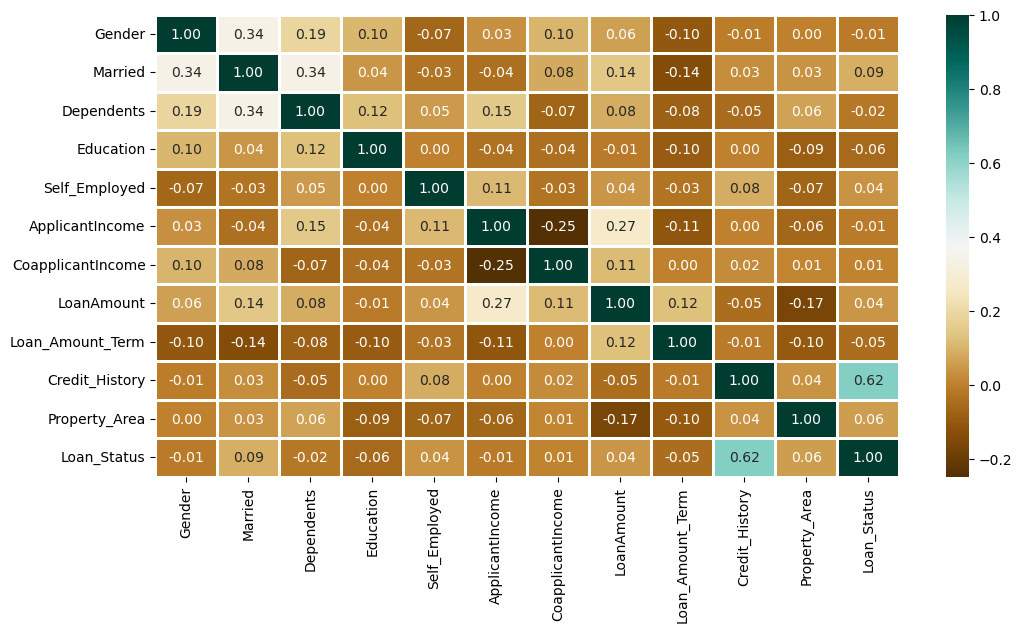

In [15]:
plt.figure(figsize=(12,6)) 

sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)


# Conclusion
-----The above heatmap is showing the correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.

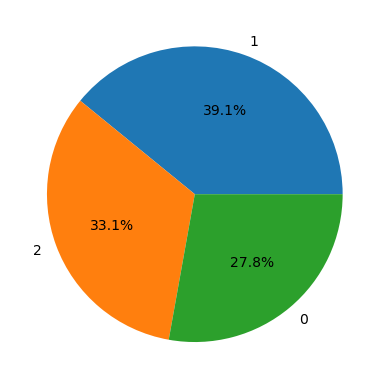

In [32]:
s=df['Property_Area'].value_counts()/df['Property_Area'].value_counts().sum()*100
plt.pie(s.values,labels=s.index,autopct='%1.1f%%')
plt.show()

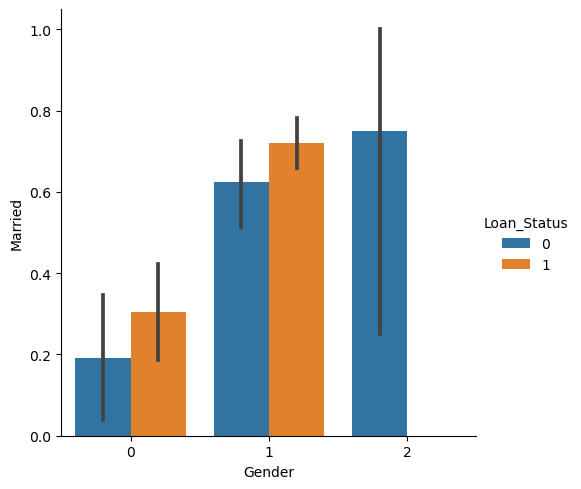

In [21]:
sns.catplot(x="Gender", y="Married",hue="Loan_Status", kind="bar", data=df)


In [25]:
for col in df.columns: 
    df[col] = df[col].fillna(df[col].mean())
    
df.isna().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Splitting data

In [26]:
from sklearn.model_selection import train_test_split 

X = df.drop(['Loan_Status'],axis=1) 
Y = df['Loan_Status'] 
X.shape,Y.shape 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((228, 11), (153, 11), (228,), (153,))

# Model Training and Evaluation

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Assuming X_train and Y_train are your training features and labels
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
lc = LogisticRegression()

for clf in (rfc, lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of", clf.__class__.__name__, "=", 100 * metrics.accuracy_score(Y_train, Y_pred))


Accuracy score of RandomForestClassifier = 98.24561403508771
Accuracy score of LogisticRegression = 83.33333333333334


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Prediction on the test set:

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Assuming X_train, Y_train, X_test, and Y_test are your training features, labels, testing features, and testing labels
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
lc = LogisticRegression()

for clf in (rfc, lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of", clf.__class__.__name__, "=", 100 * metrics.accuracy_score(Y_test, Y_pred))


Accuracy score of RandomForestClassifier = 81.04575163398692
Accuracy score of LogisticRegression = 86.27450980392157


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Conclusion-
Random Forest Classifier is giving the best accuracy with an accuracy score of 81% for the testing dataset. And to get much better results ensemble learning techniques like Bagging and Boosting can also be used.





That in system Data cleansing and processing, imputation of missing values, experimental analysis of the data set, model construction, model evaluation, and model testing are all steps in the prediction process. The highest level of accuracy on the data set, based on the Training Model.
